In [1]:
import numpy as np
import powerspectrum as ps
import posterior as pt
import random_num as rn
import os
import matplotlib.pyplot as plt

In [2]:
def get_points_from_npy(redshifts,xes,file_name="check.ini",root="output/a_check",p_name=["r"],p_value=[0.001]):
    points=[]
    for i in range(len(redshifts)):
        obj=rn.random_num(True,redshifts[i],xes[i],file_name=file_name,root=root,p_name=p_name,p_value=p_value,verbose=False)
        points.append(obj)
    return points

In [3]:
redshifts=np.load("week8_random/totalz.npy")
xes=np.load("week8_random/totalxe.npy")

In [4]:
points=get_points_from_npy(redshifts,xes,p_value=[0.01])

In [5]:
sigma_nu=2*np.pi/180/60
Tcmb=2.75*10**6
theta_nu=30*np.pi/180/60
spectrum=np.zeros(2002)

for i in np.arange(2,2002,1):
    spectrum[i-2]=(sigma_nu/Tcmb)**2*np.exp(i*(i+1)*theta_nu**2/8/np.log(2))

In [6]:
def error_cal(CL,NNs,ell):
    errors=np.zeros(ell-2)
    f_sky=1
    delta_l=1
    for i in np.arange(2,ell,1):
        errors[i-2]=((CL[i-2]+NNs[i-2])/np.sqrt((i+0.5)*f_sky*delta_l))
    return errors

In [7]:
def plot_ps(data1,data2,ell_E,ell_B,error_E,error_B):
    #data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_cl_lensed.dat')
    l1=data1[:,0]
    l2=data2[:,0]
    EE1=data1[:,1]
    EE2=data2[:,1]
    #plt.plot(l1[0:ell_E-2],EE1[0:ell_E-2],label="random")
    plt.errorbar(l1[0:ell_E-2],EE1[0:ell_E-2],yerr=error_E[0:ell_E-2],label="random")
    plt.plot(l2[0:ell_E-2],EE2[0:ell_E-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()

    BB1=data1[:,2]
    BB2=data2[:,2]
    #plt.plot(l1[0:ell_B-2],BB1[0:ell_B-2],label="random")
    plt.errorbar(l1[0:ell_B-2],BB1[0:ell_B-2],yerr=error_B[0:ell_B-2],label="random")
    plt.plot(l2[0:ell_B-2],BB2[0:ell_B-2],label="best-fit")
    plt.yscale('log')
    plt.legend()
    plt.show()



In [8]:
best_fit_10=np.load("/home/hcjiang/class/result_24_02_15/small/10/best_fit.npy")
best_fit_10_2002=np.load("/home/hcjiang/class/result_24_02_15/small/10_2002/best_fit.npy")
best_fit_2002=np.load("/home/hcjiang/class/result_24_02_15/small/2002/best_fit.npy")

In [9]:
best_fit_10[1]

array([7.625e-03, 1.003e+01])

In [10]:
def chi2(spectrum,Cl_fid,Cl,ell=10):
        sum=0
        for i in range(ell-2):
            sum+=(2*(i+2)+1)*((Cl_fid[i]+spectrum[i])/(Cl[i]+spectrum[i])+np.log(Cl[i]+spectrum[i])-(2*(i+2)-1)/(2*(i+2)+1)*np.log(Cl_fid[i]+spectrum[i]))
        return sum

In [11]:
chi2_10=[]
chi2_10_2002=[]
chi2_2002=[]

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.173814
    giving an angle 100*theta_* = 1.044115
 -> baryon drag stops at z = 1059.892934
    corresponding to conformal time = 286.321912 Mpc
    with comoving sound horizon rs = 147.073995 Mpc
 -> many-step reionization gives optical depth = 0.053832


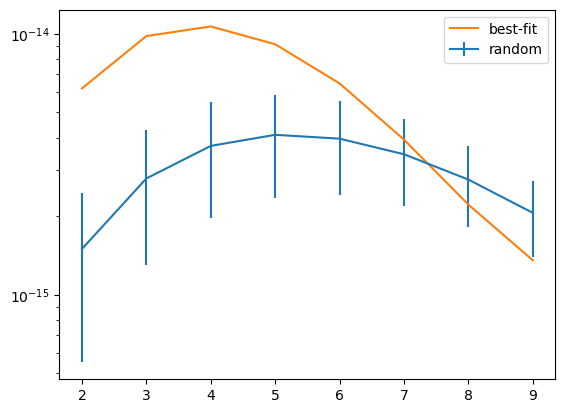

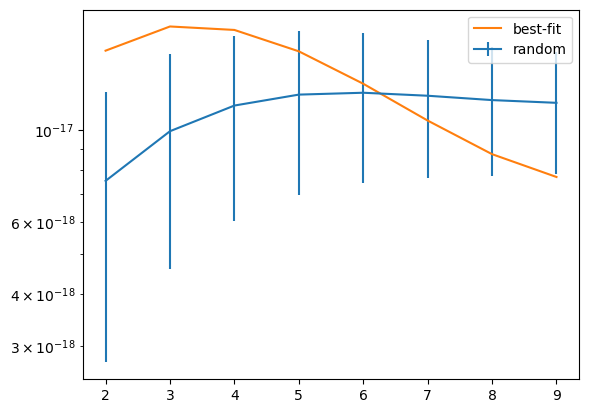

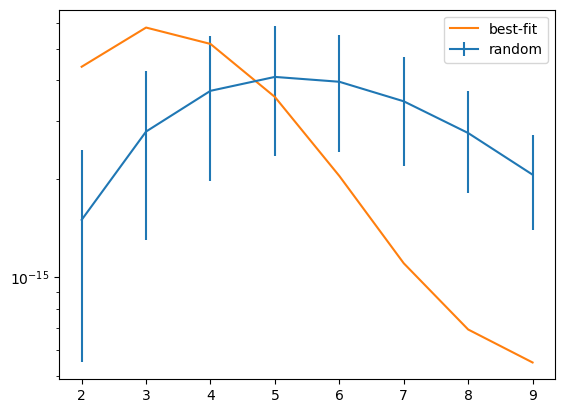

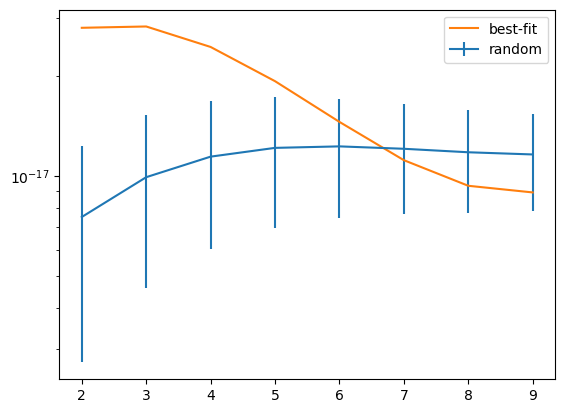

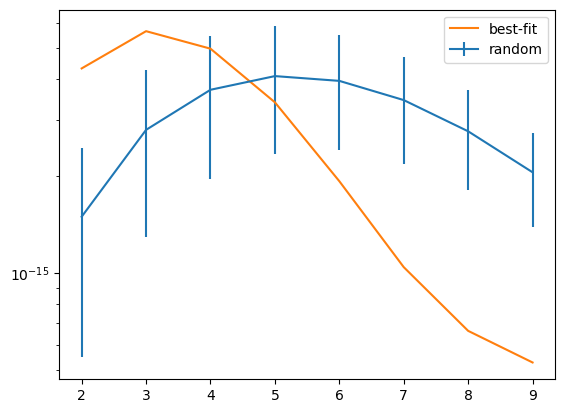

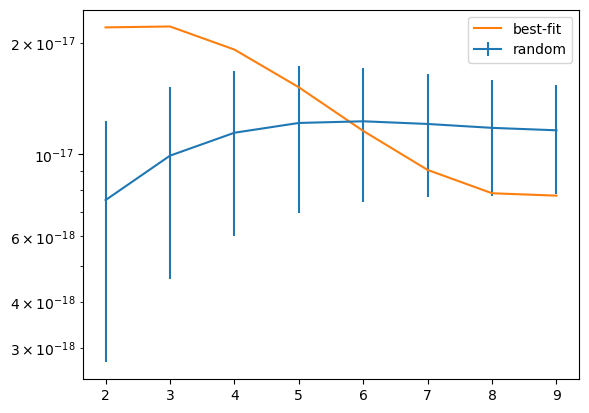

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.069120
    giving an angle 100*theta_* = 1.044828
 -> baryon drag stops at z = 1059.895241
    corresponding to conformal time = 286.321449 Mpc
    with comoving sound horizon rs = 147.073786 Mpc
 -> many-step reionization gives optical depth = 0.066095


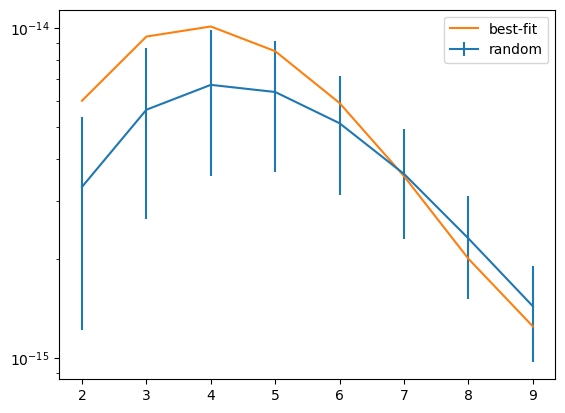

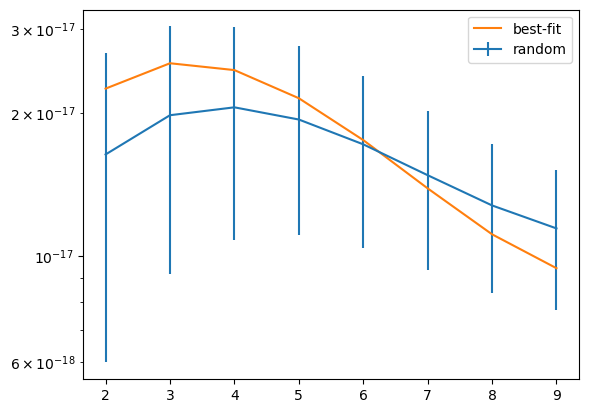

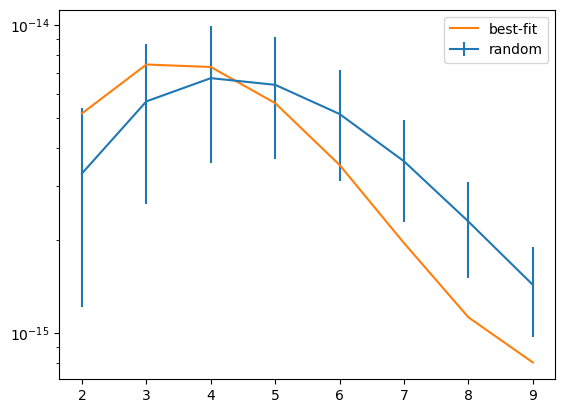

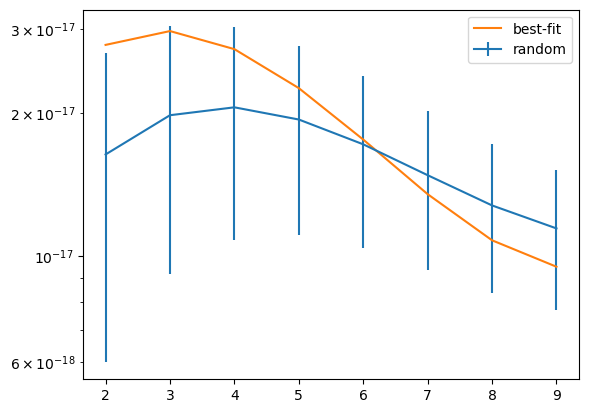

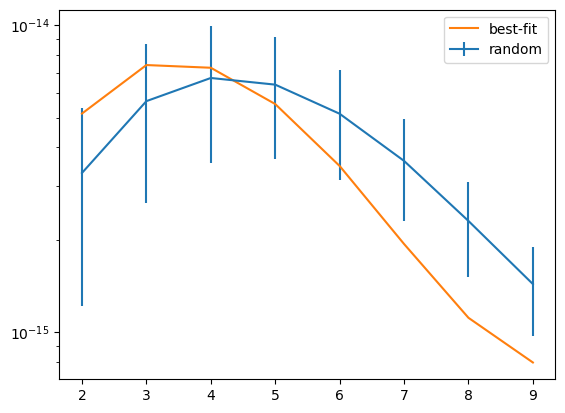

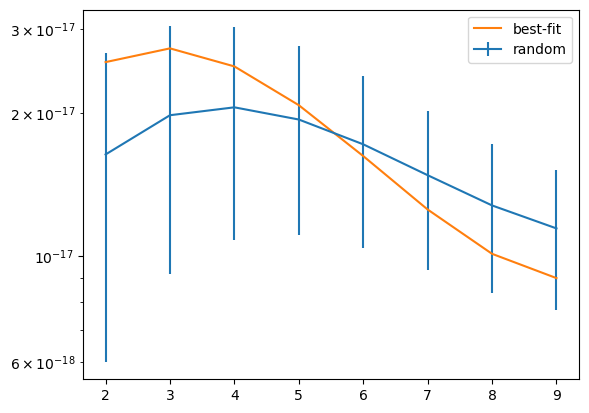

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.946873
    giving an angle 100*theta_* = 1.044261
 -> baryon drag stops at z = 1059.897007
    corresponding to conformal time = 286.321094 Mpc
    with comoving sound horizon rs = 147.073626 Mpc
 -> many-step reionization gives optical depth = 0.056356


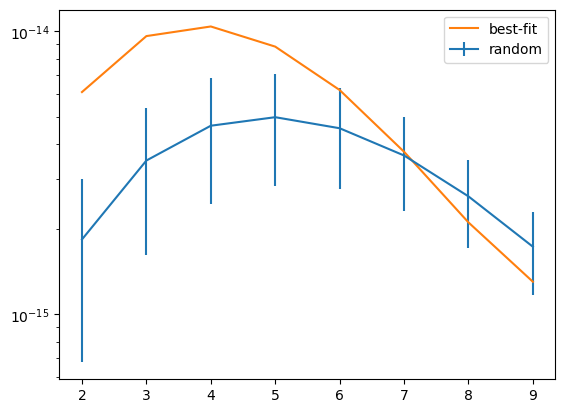

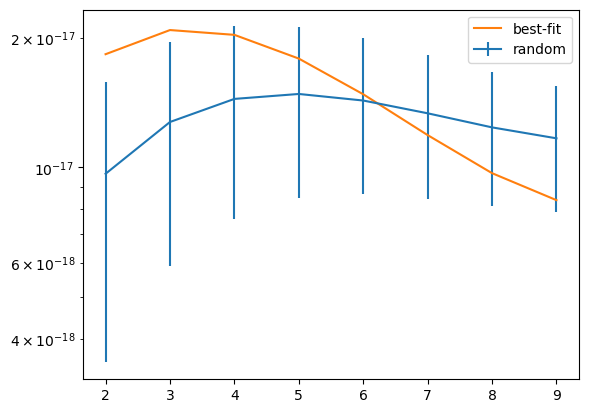

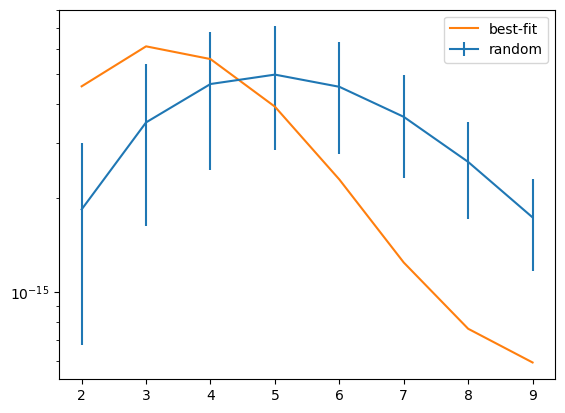

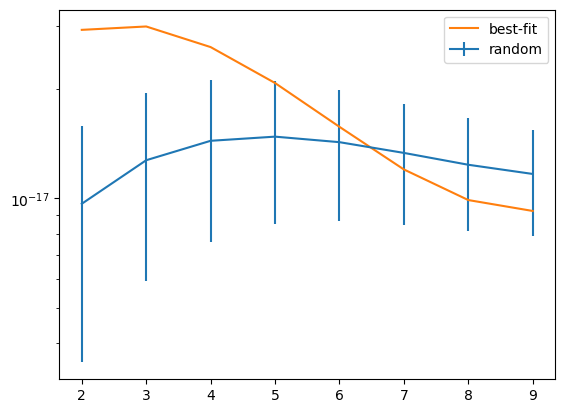

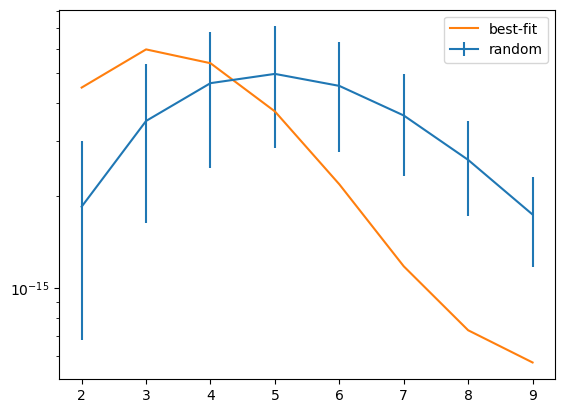

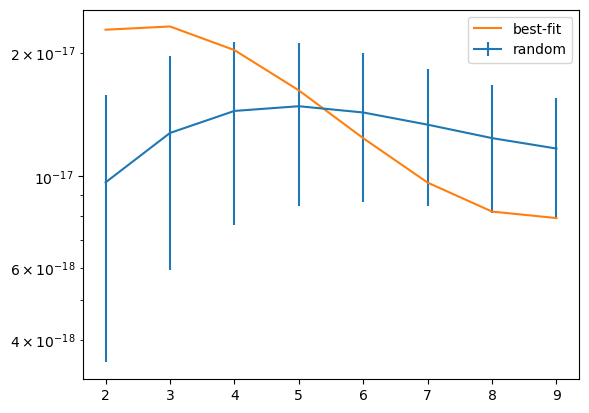

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.233803
    giving an angle 100*theta_* = 1.044076
 -> baryon drag stops at z = 1059.881598
    corresponding to conformal time = 286.324187 Mpc
    with comoving sound horizon rs = 147.075020 Mpc
 -> many-step reionization gives optical depth = 0.053175


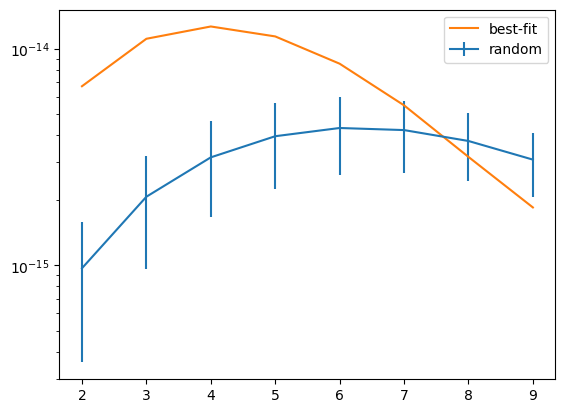

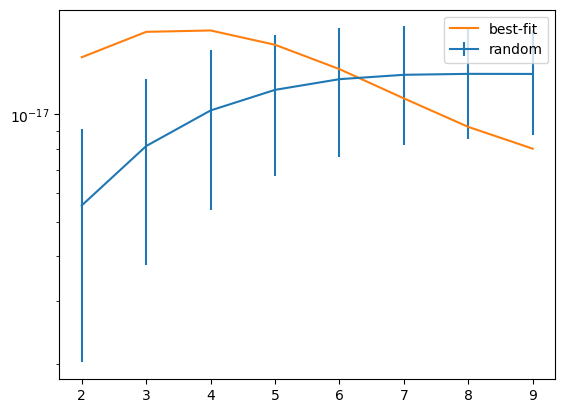

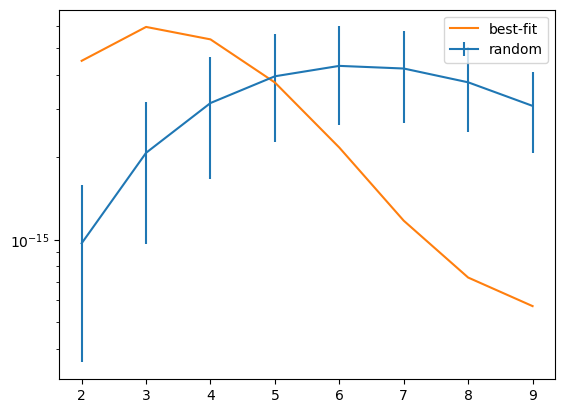

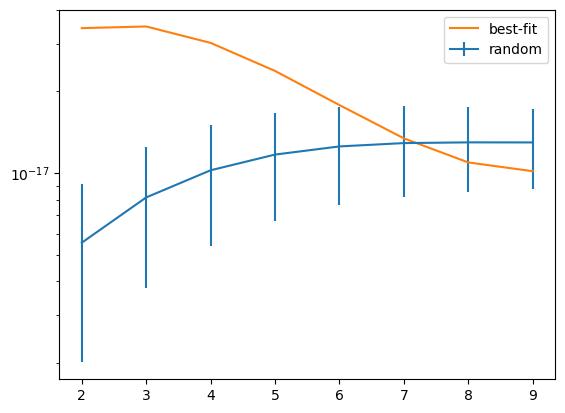

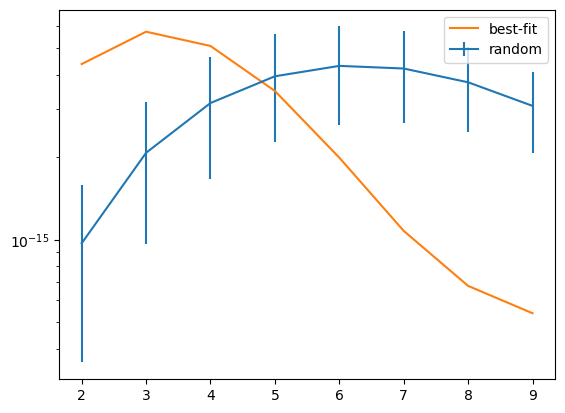

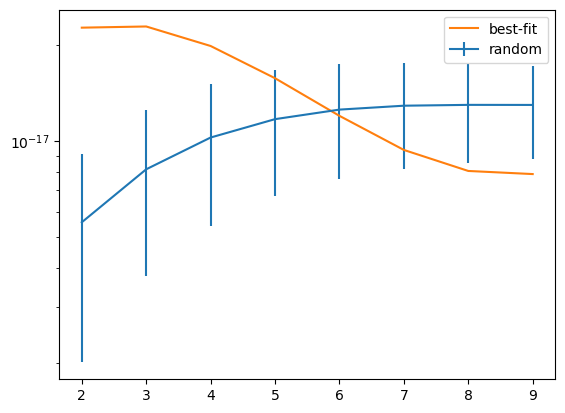

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.507993
    giving an angle 100*theta_* = 1.045191
 -> baryon drag stops at z = 1059.885634
    corresponding to conformal time = 286.323377 Mpc
    with comoving sound horizon rs = 147.074655 Mpc
 -> many-step reionization gives optical depth = 0.072273


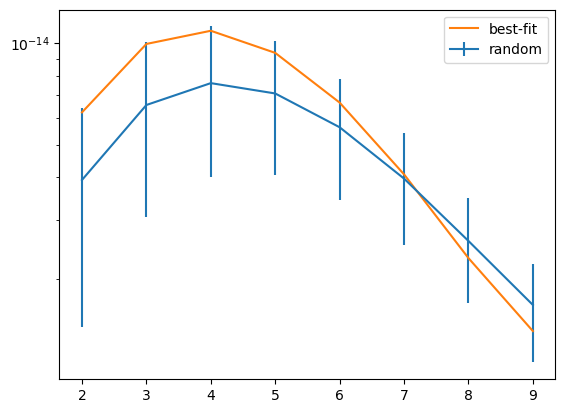

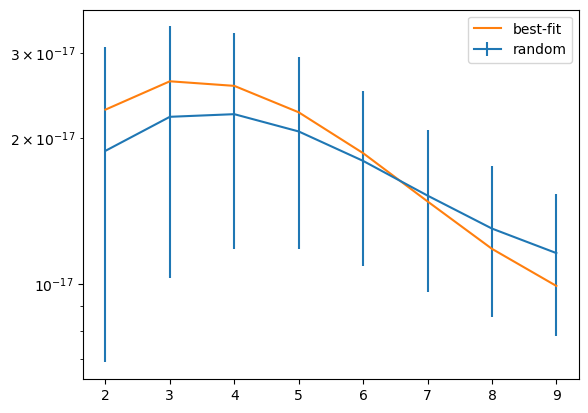

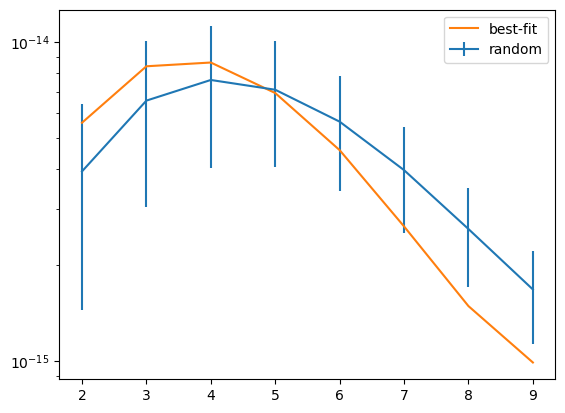

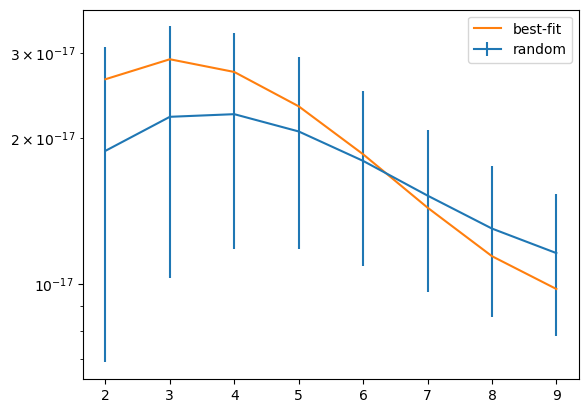

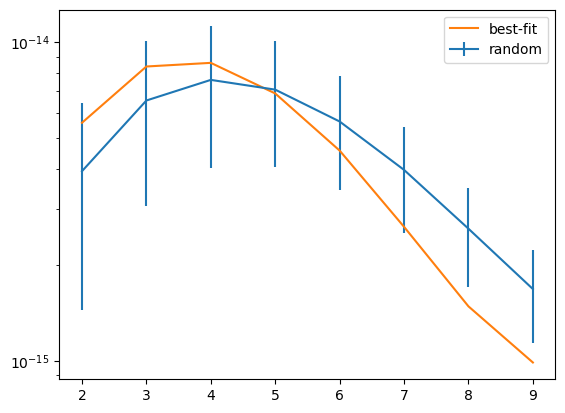

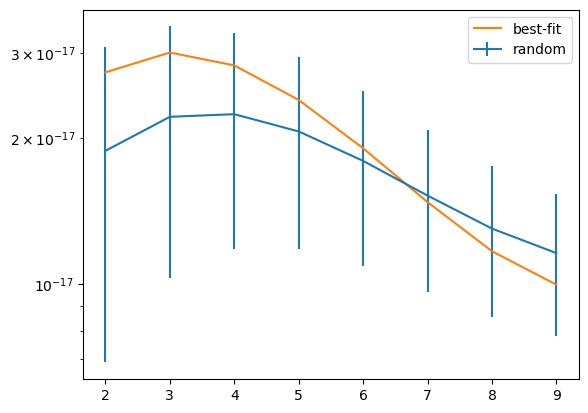

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.107492
    giving an angle 100*theta_* = 1.045450
 -> baryon drag stops at z = 1059.887302
    corresponding to conformal time = 286.323042 Mpc
    with comoving sound horizon rs = 147.074504 Mpc
 -> many-step reionization gives optical depth = 0.076655


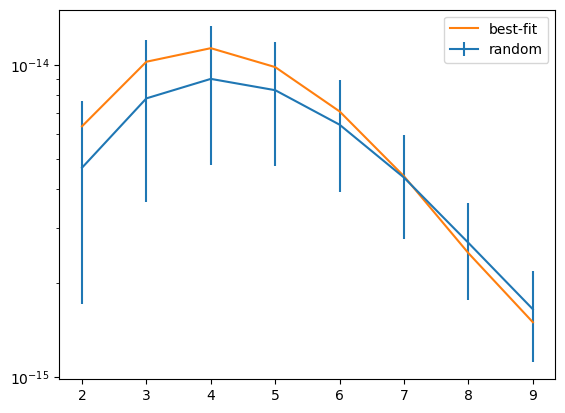

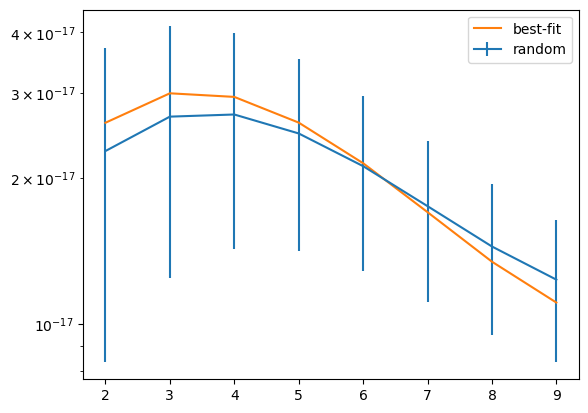

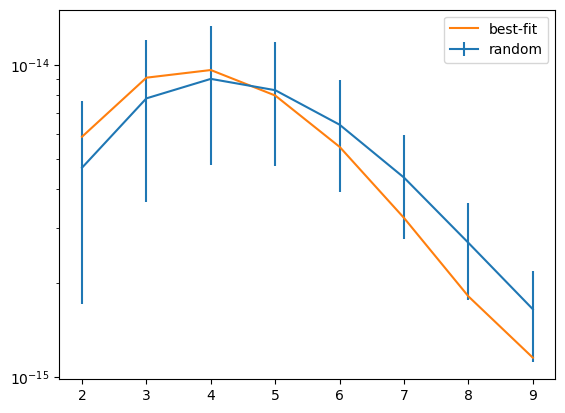

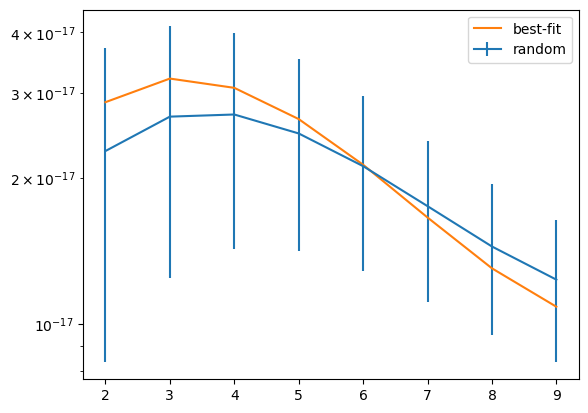

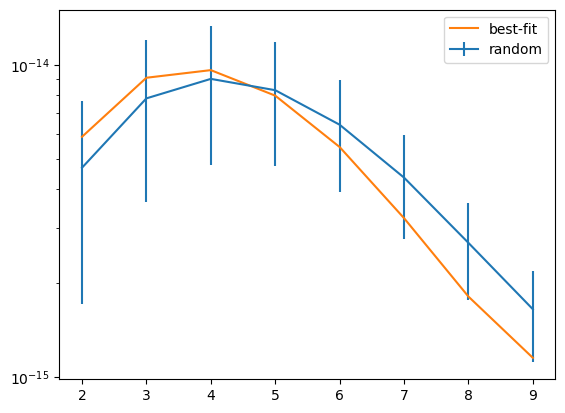

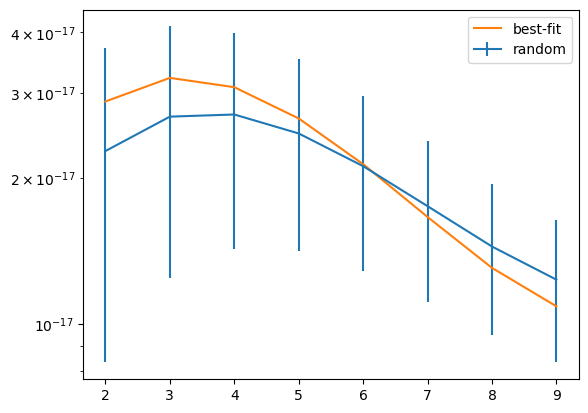

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.857227
    giving an angle 100*theta_* = 1.043674
 -> baryon drag stops at z = 1059.906576
    corresponding to conformal time = 286.319174 Mpc
    with comoving sound horizon rs = 147.072760 Mpc
 -> many-step reionization gives optical depth = 0.046182


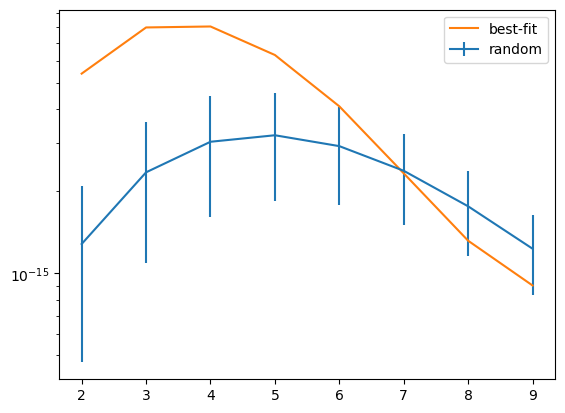

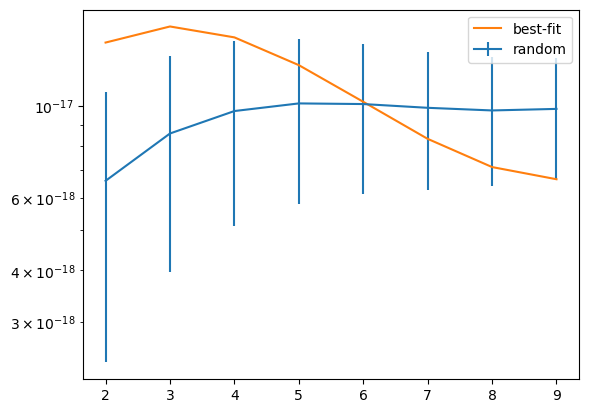

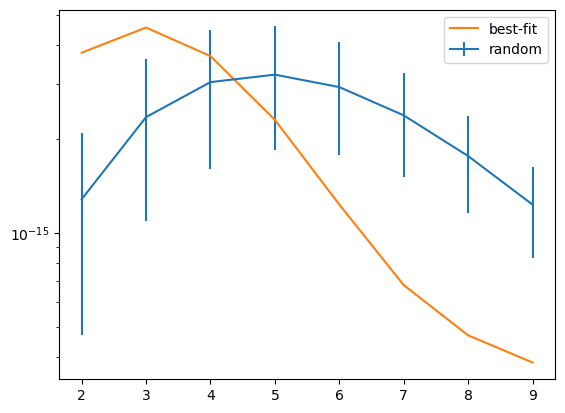

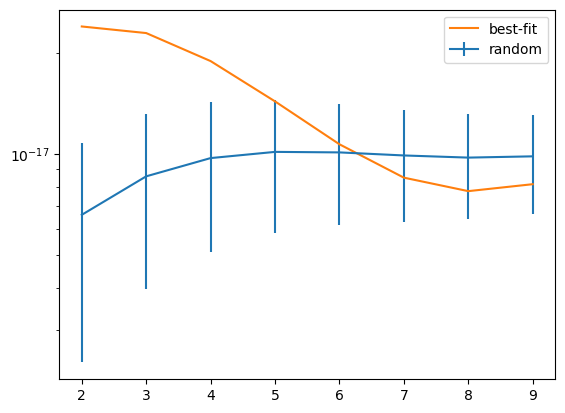

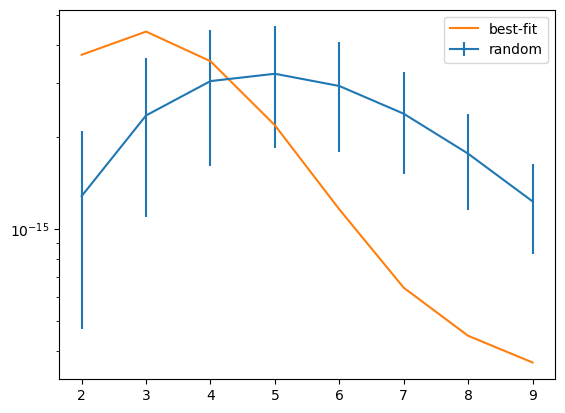

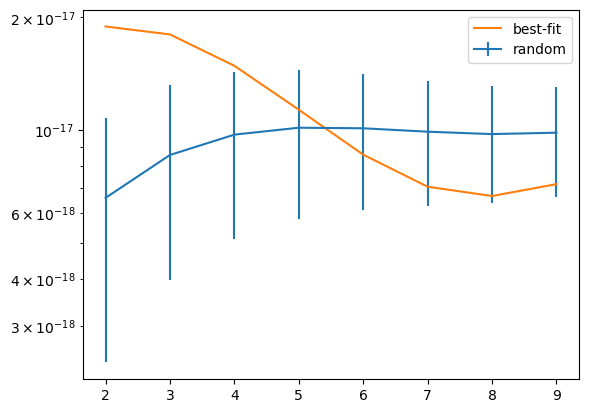

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.367693
    giving an angle 100*theta_* = 1.043990
 -> baryon drag stops at z = 1059.893981
    corresponding to conformal time = 286.321701 Mpc
    with comoving sound horizon rs = 147.073900 Mpc
 -> many-step reionization gives optical depth = 0.051682


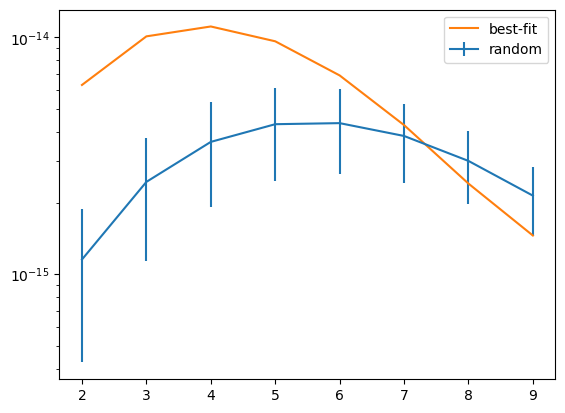

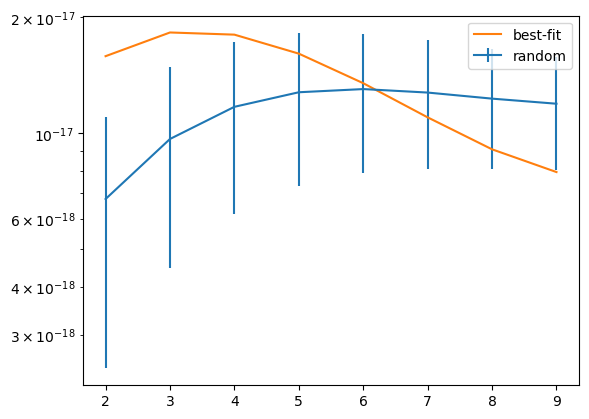

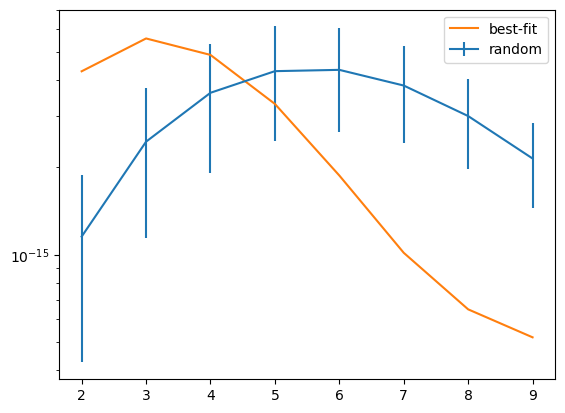

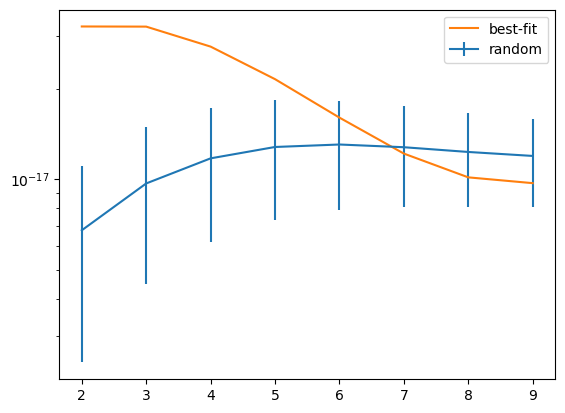

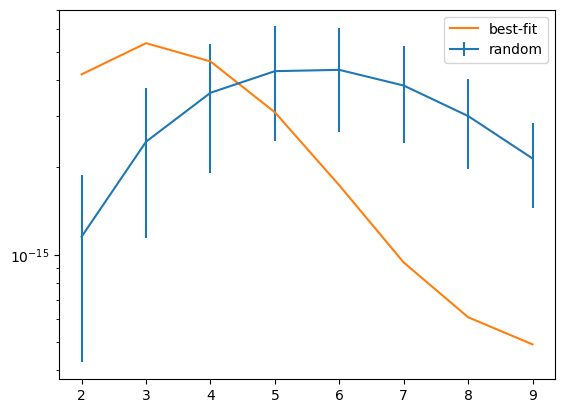

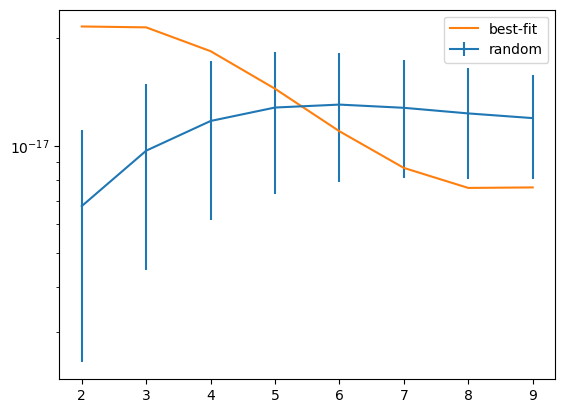

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.634985
    giving an angle 100*theta_* = 1.045109
 -> baryon drag stops at z = 1059.894930
    corresponding to conformal time = 286.321511 Mpc
    with comoving sound horizon rs = 147.073814 Mpc
 -> many-step reionization gives optical depth = 0.070853


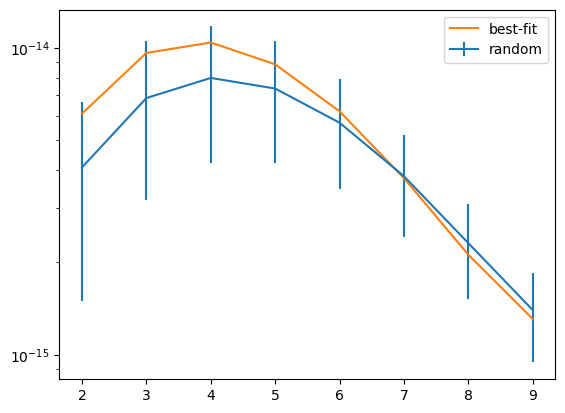

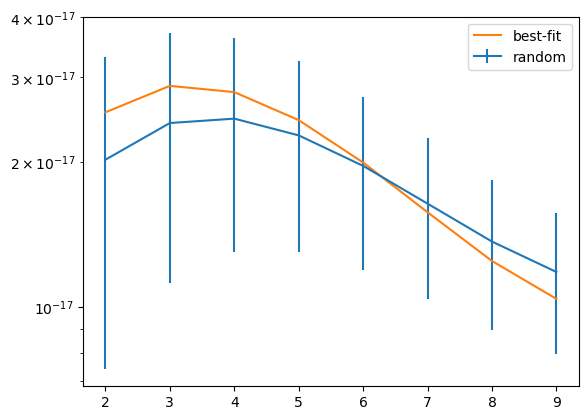

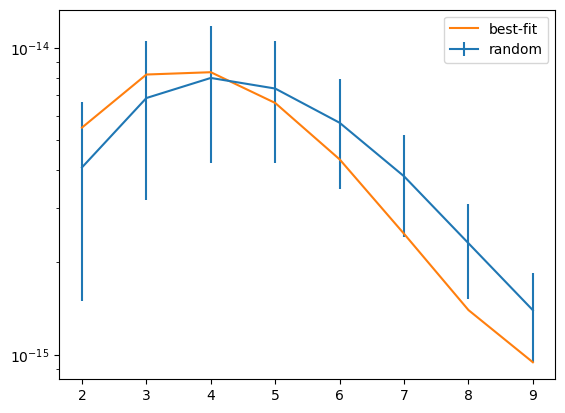

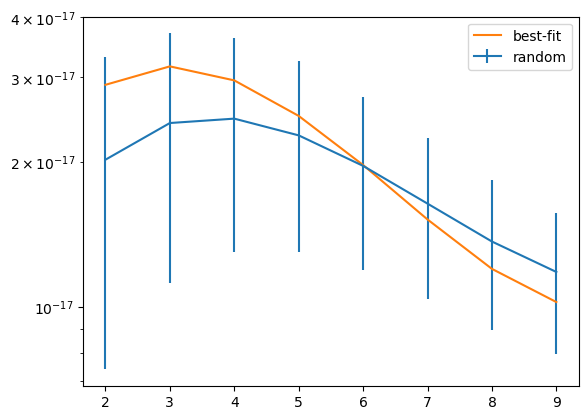

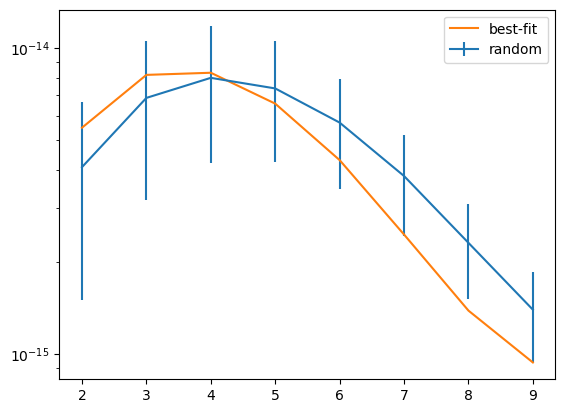

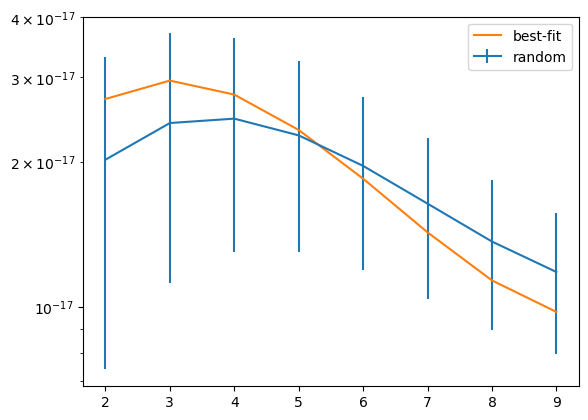

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.152460
    giving an angle 100*theta_* = 1.044129
 -> baryon drag stops at z = 1059.899323
    corresponding to conformal time = 286.320629 Mpc
    with comoving sound horizon rs = 147.073416 Mpc
 -> many-step reionization gives optical depth = 0.054085


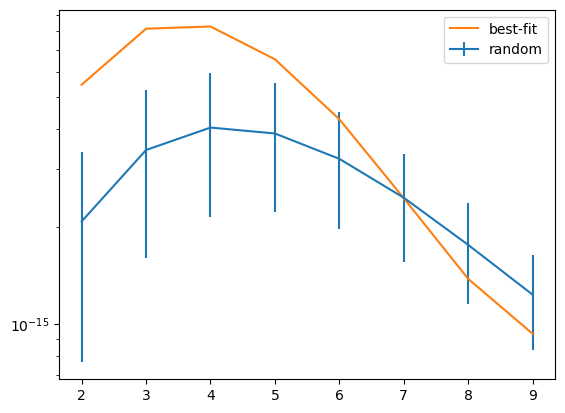

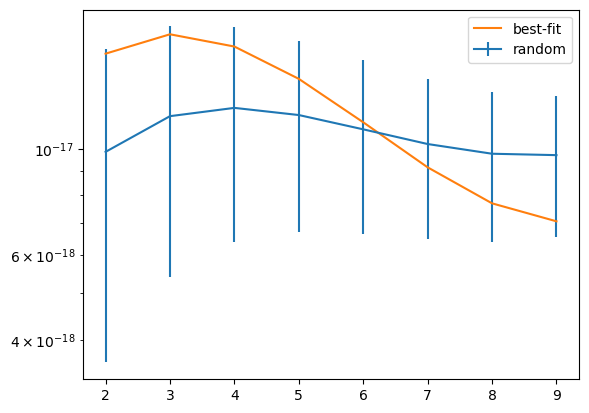

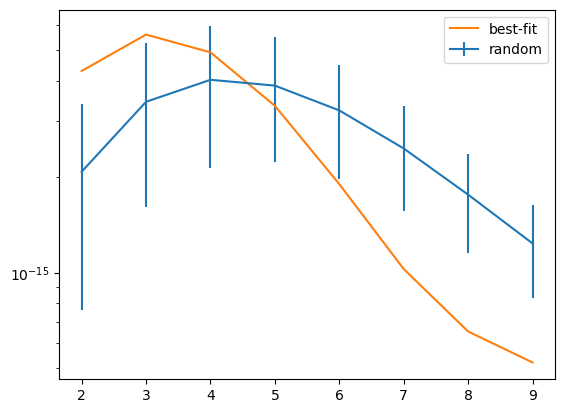

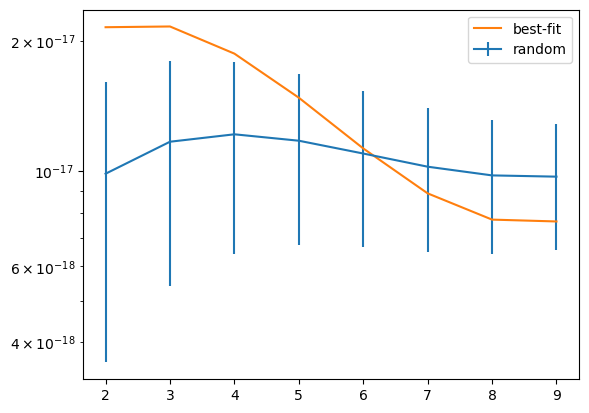

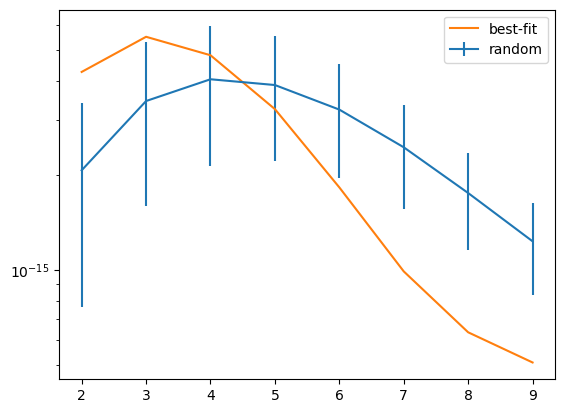

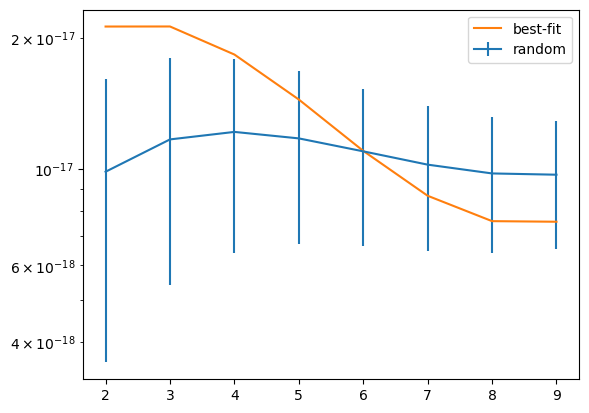

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.516021
    giving an angle 100*theta_* = 1.043894
 -> baryon drag stops at z = 1059.888364
    corresponding to conformal time = 286.322829 Mpc
    with comoving sound horizon rs = 147.074408 Mpc
 -> many-step reionization gives optical depth = 0.050024


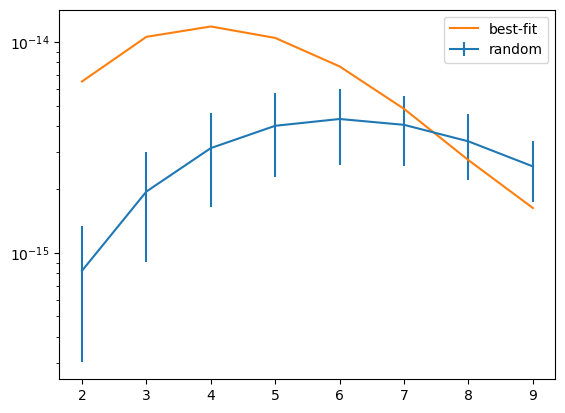

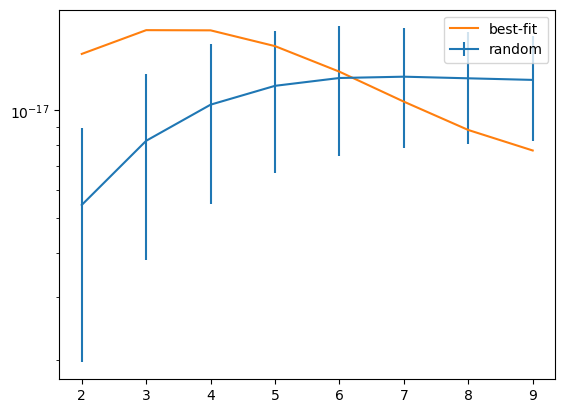

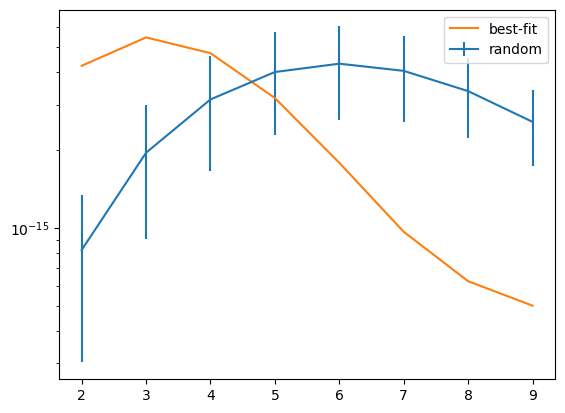

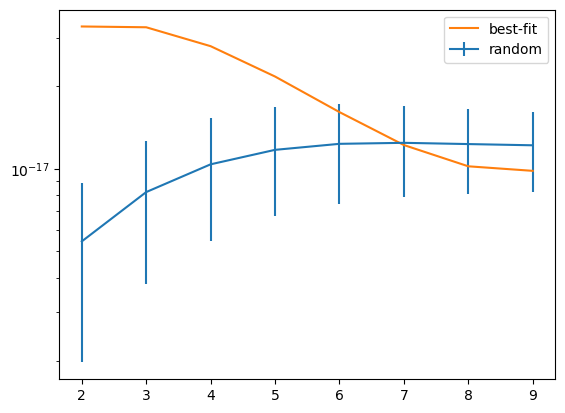

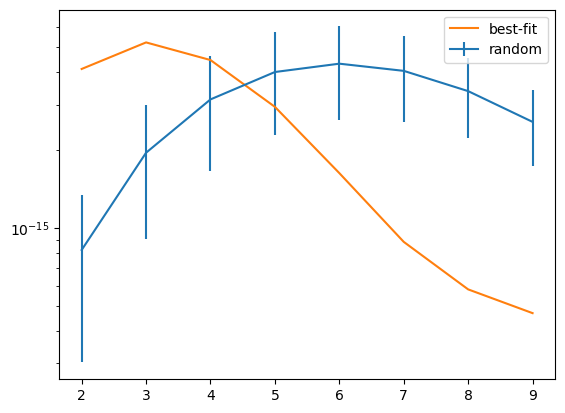

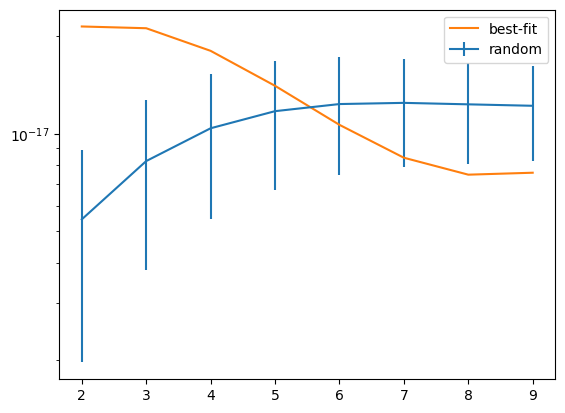

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.037673
    giving an angle 100*theta_* = 1.044203
 -> baryon drag stops at z = 1059.890587
    corresponding to conformal time = 286.322383 Mpc
    with comoving sound horizon rs = 147.074207 Mpc
 -> many-step reionization gives optical depth = 0.055355


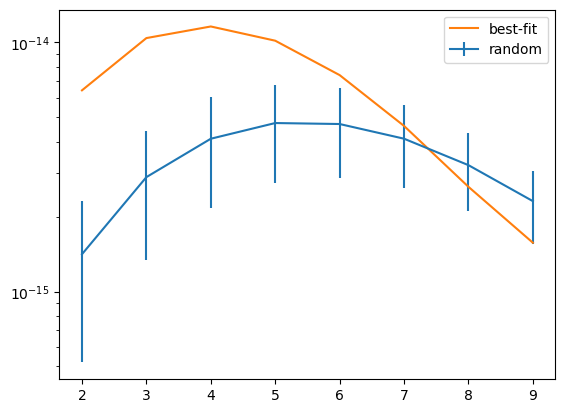

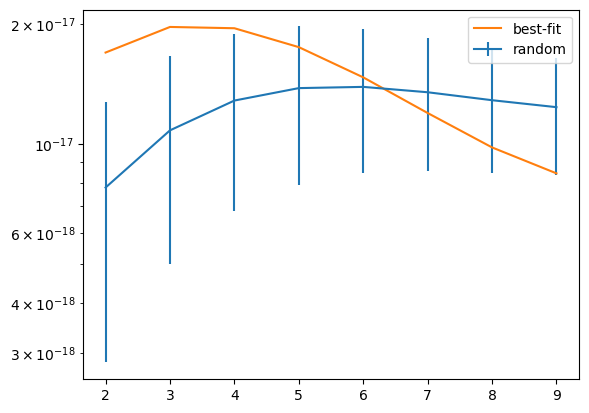

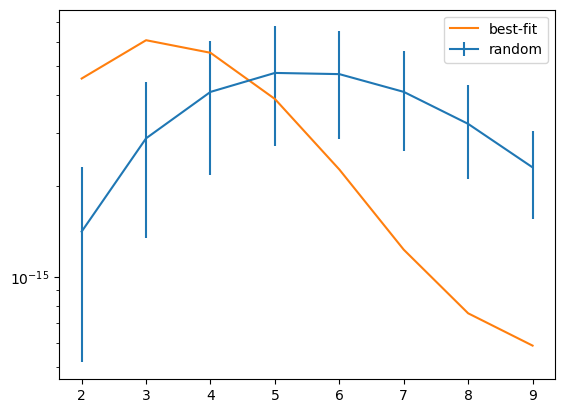

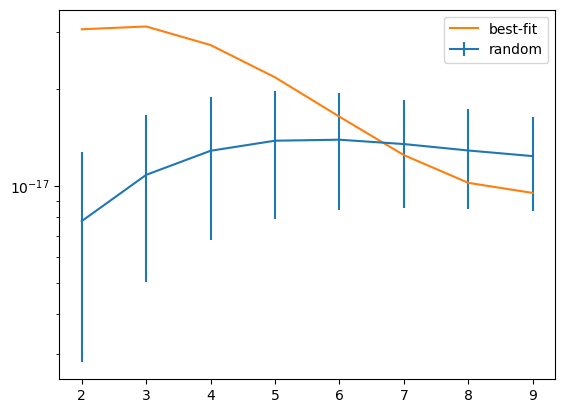

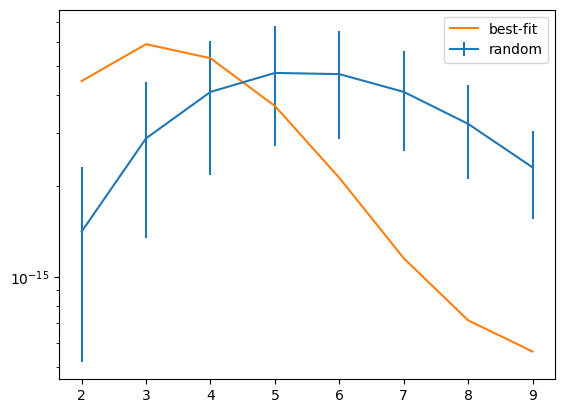

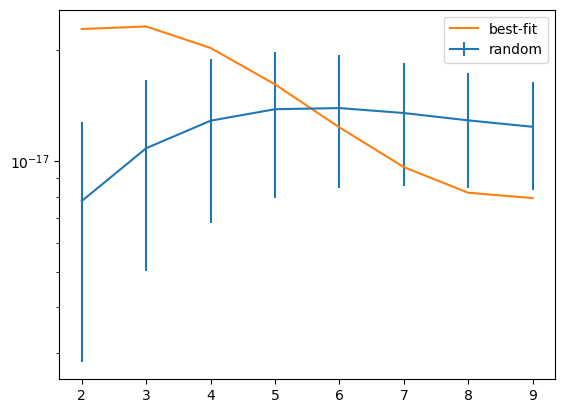

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.060045
    giving an angle 100*theta_* = 1.044188
 -> baryon drag stops at z = 1059.904218
    corresponding to conformal time = 286.319647 Mpc
    with comoving sound horizon rs = 147.072973 Mpc
 -> many-step reionization gives optical depth = 0.055091


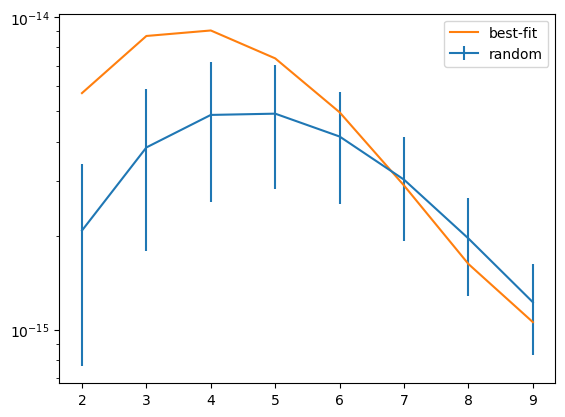

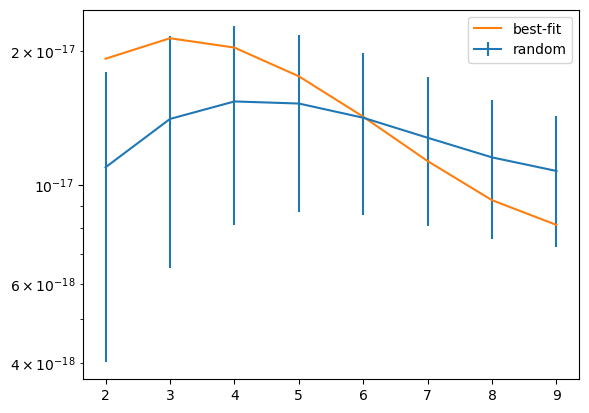

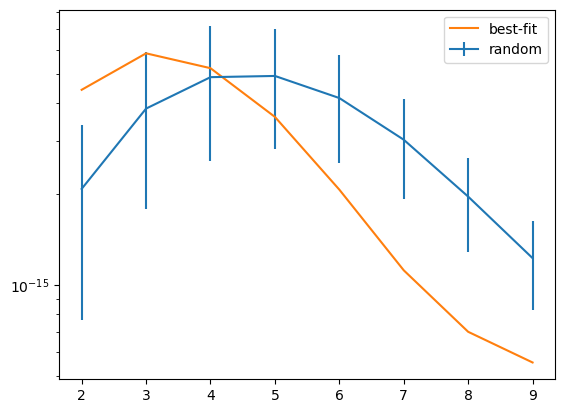

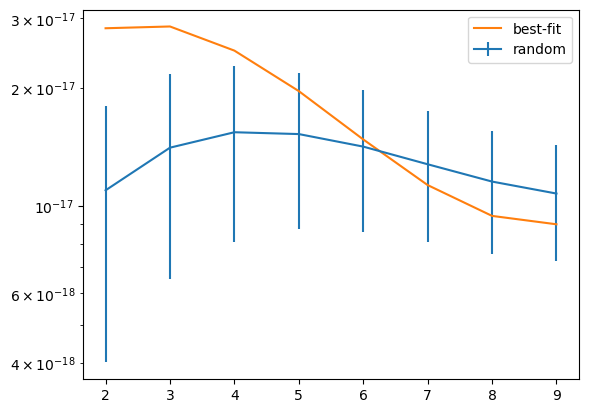

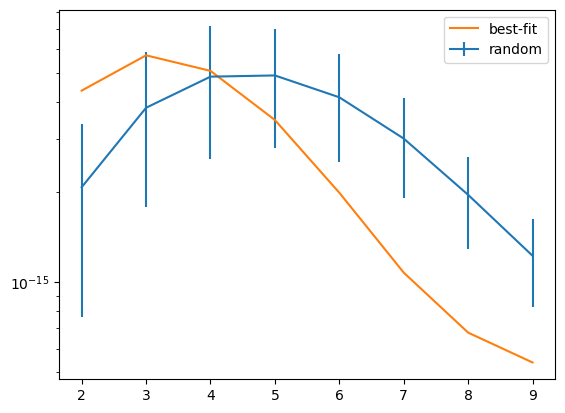

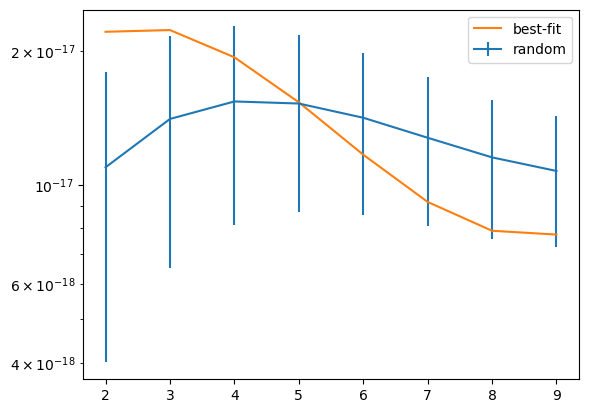

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.571247
    giving an angle 100*theta_* = 1.043858
 -> baryon drag stops at z = 1059.880980
    corresponding to conformal time = 286.324311 Mpc
    with comoving sound horizon rs = 147.075076 Mpc
 -> many-step reionization gives optical depth = 0.049410


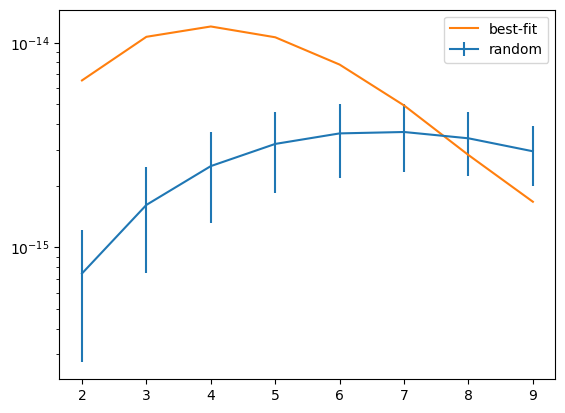

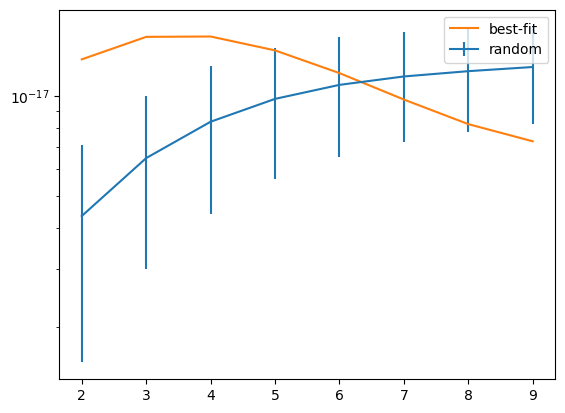

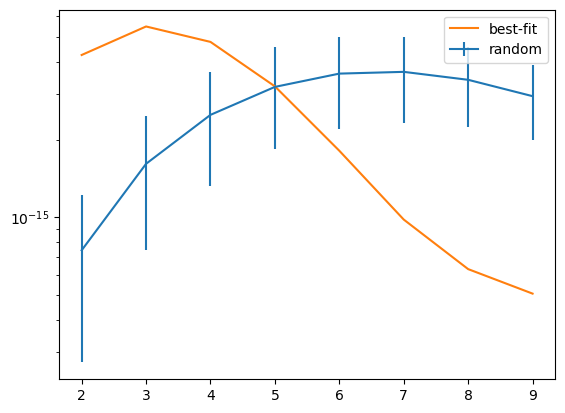

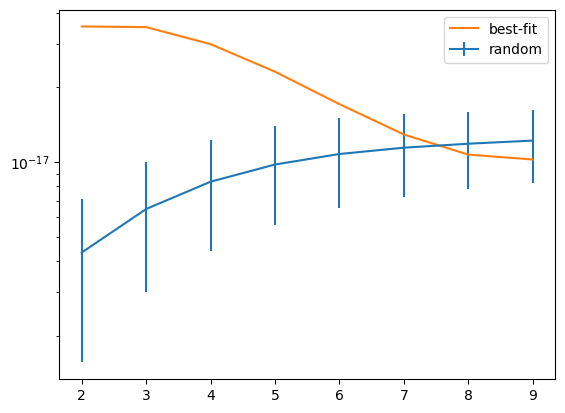

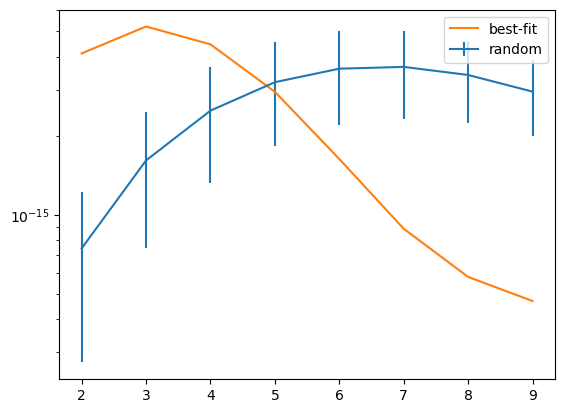

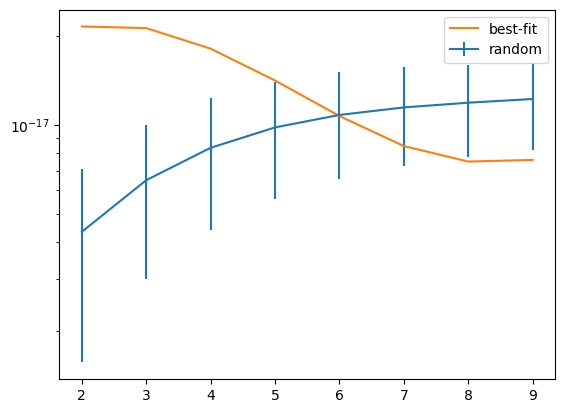

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.294872
    giving an angle 100*theta_* = 1.044682
 -> baryon drag stops at z = 1059.890639
    corresponding to conformal time = 286.322372 Mpc
    with comoving sound horizon rs = 147.074202 Mpc
 -> many-step reionization gives optical depth = 0.063591


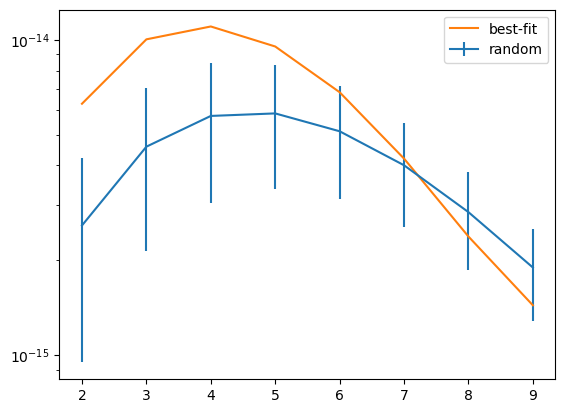

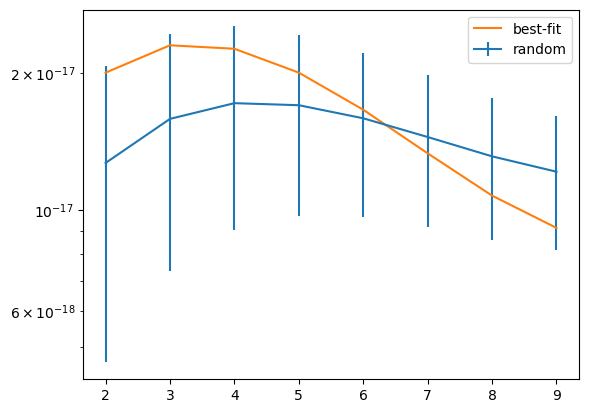

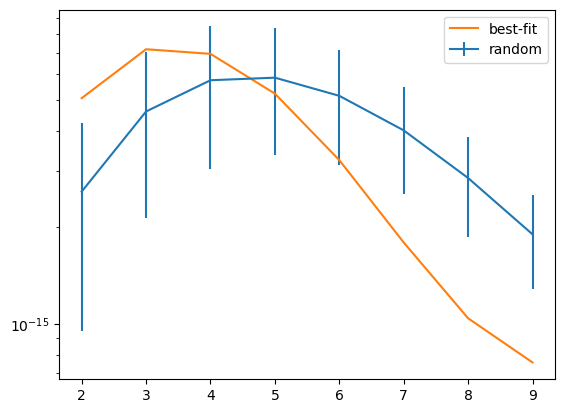

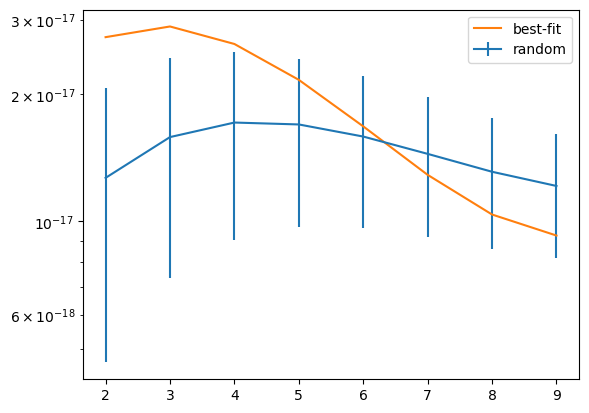

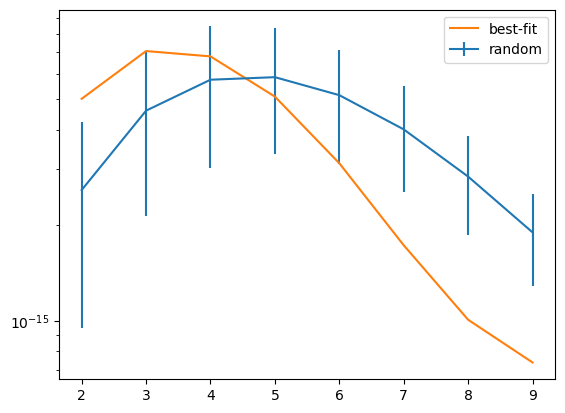

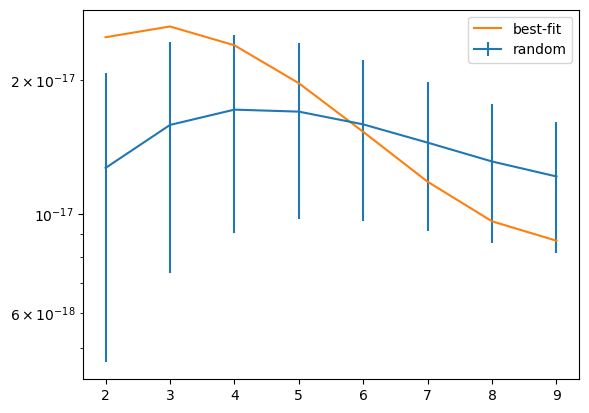

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.776778
    giving an angle 100*theta_* = 1.043726
 -> baryon drag stops at z = 1059.919812
    corresponding to conformal time = 286.316517 Mpc
    with comoving sound horizon rs = 147.071562 Mpc
 -> many-step reionization gives optical depth = 0.047094


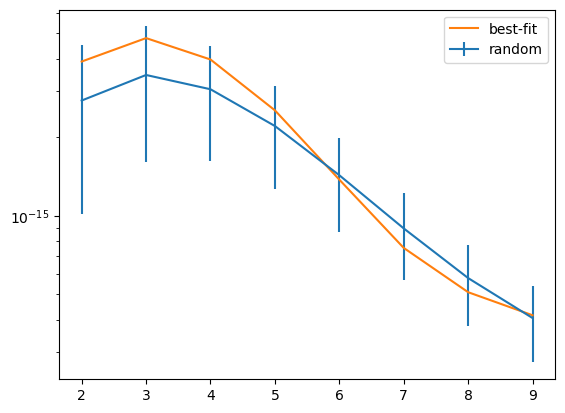

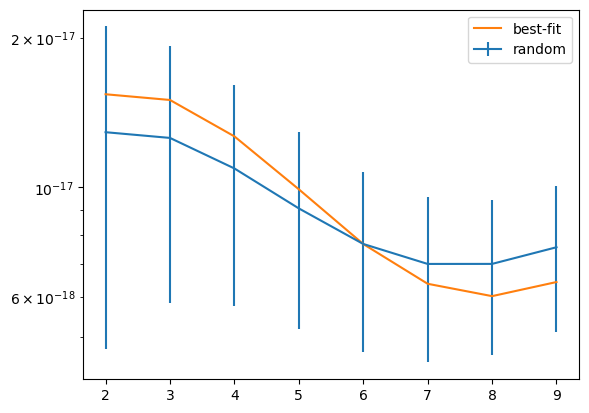

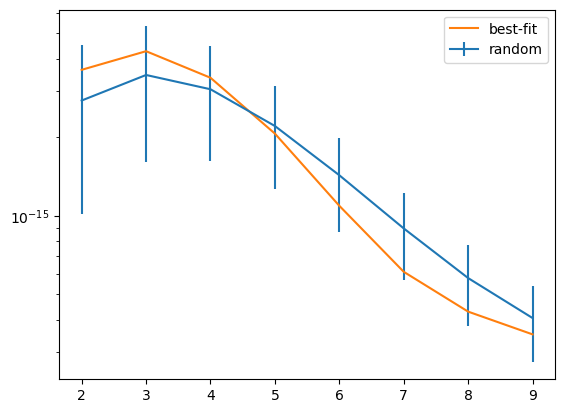

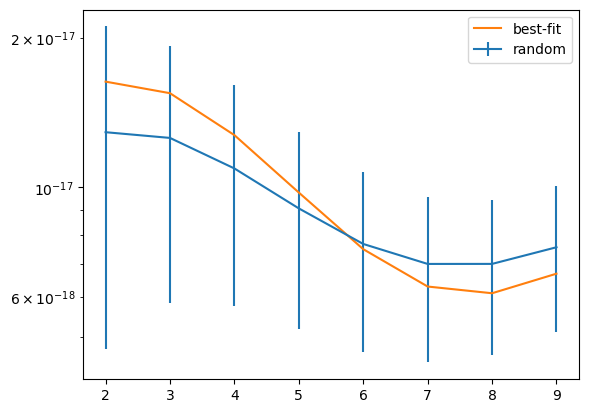

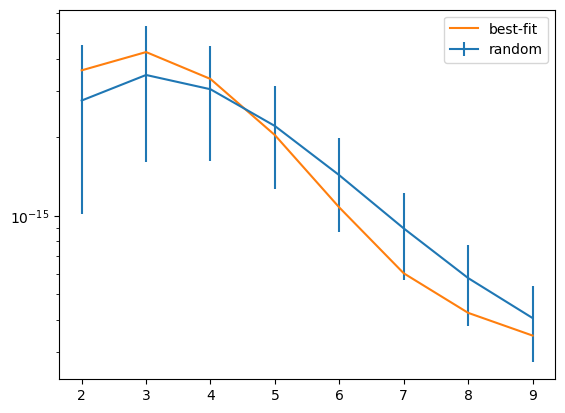

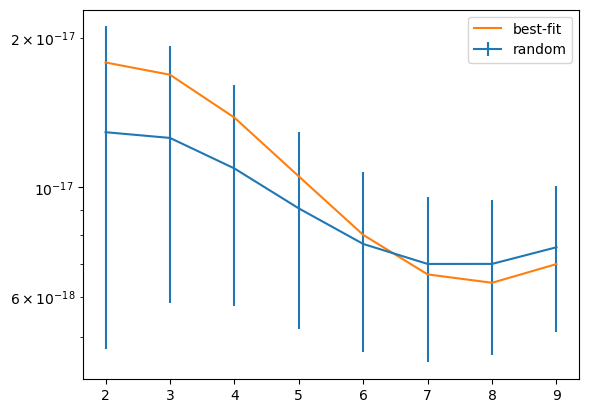

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.764990
    giving an angle 100*theta_* = 1.044379
 -> baryon drag stops at z = 1059.891527
    corresponding to conformal time = 286.322194 Mpc
    with comoving sound horizon rs = 147.074122 Mpc
 -> many-step reionization gives optical depth = 0.058390


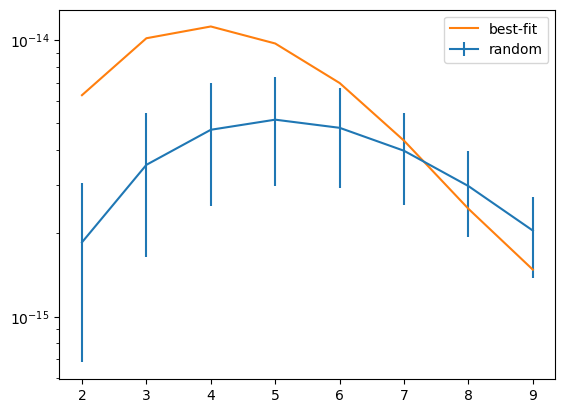

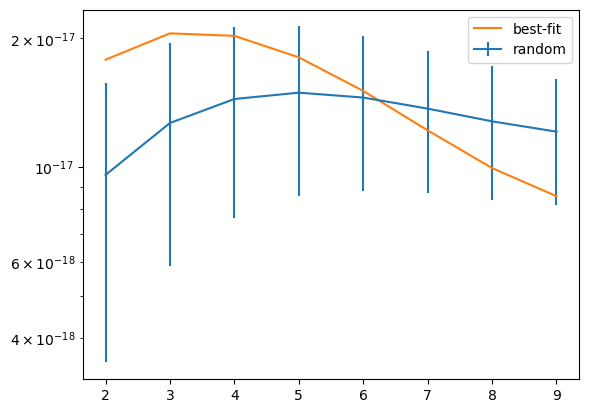

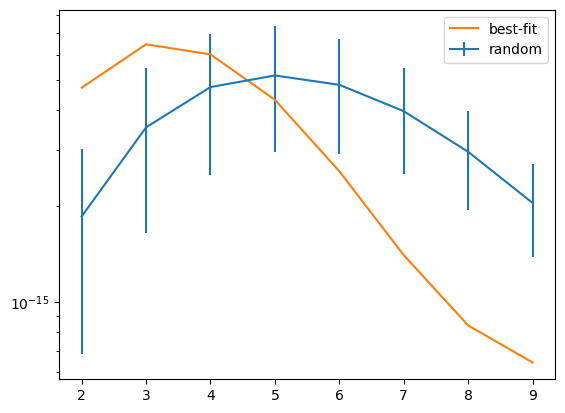

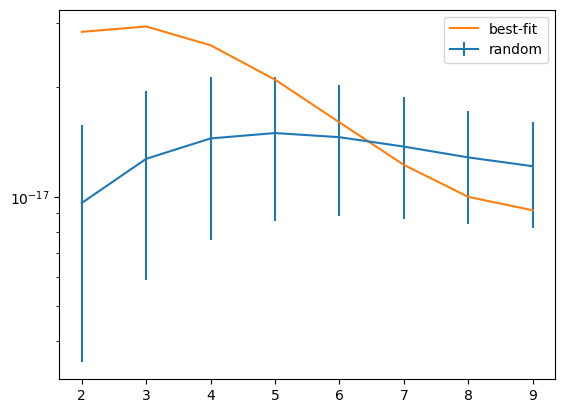

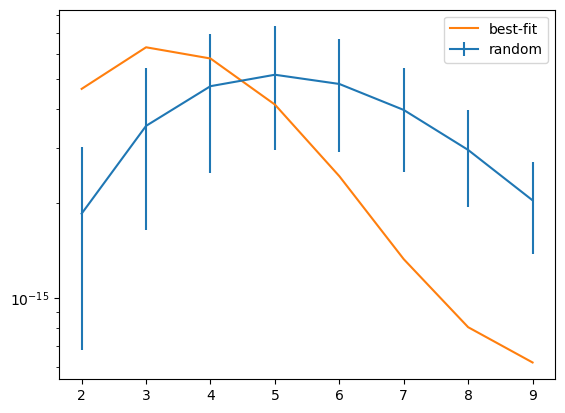

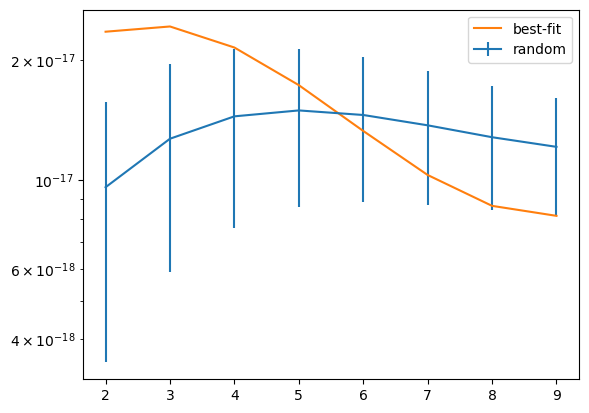

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.192457
    giving an angle 100*theta_* = 1.044103
 -> baryon drag stops at z = 1059.892551
    corresponding to conformal time = 286.321988 Mpc
    with comoving sound horizon rs = 147.074029 Mpc
 -> many-step reionization gives optical depth = 0.053620


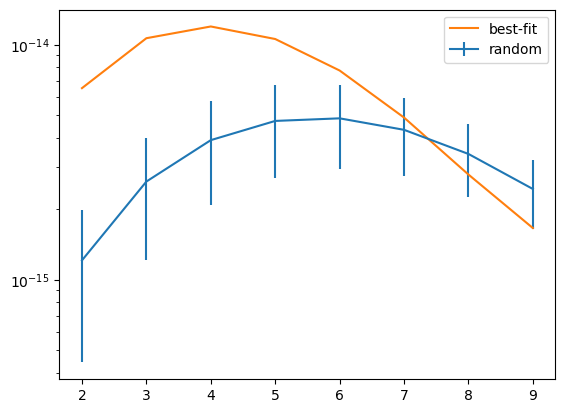

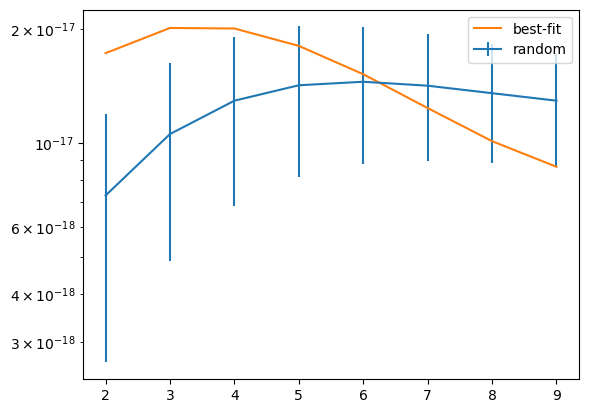

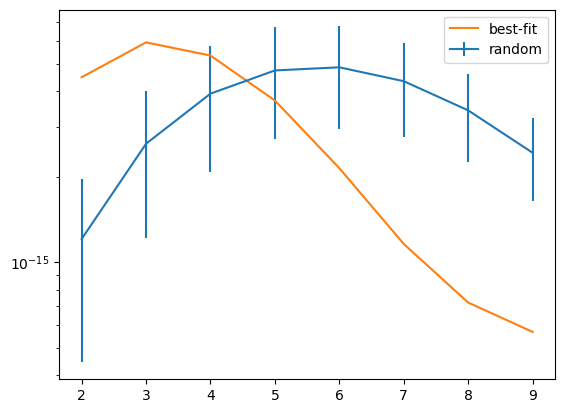

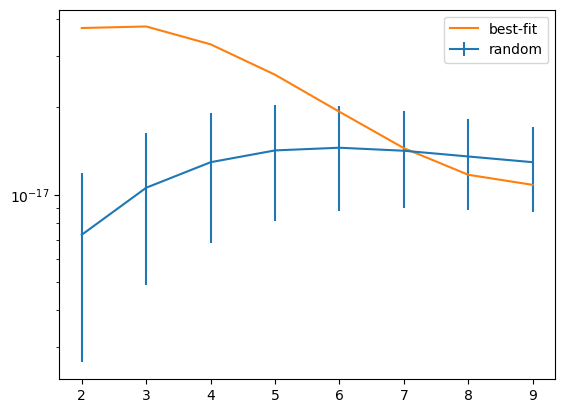

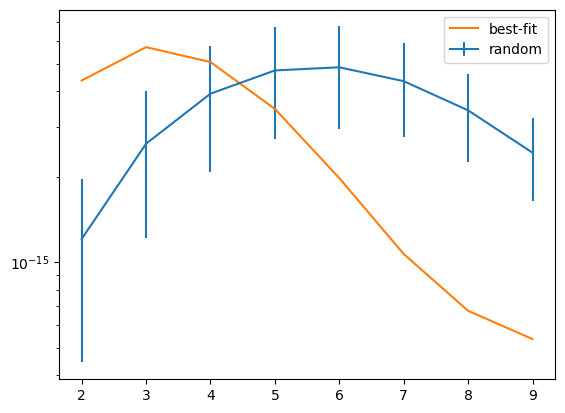

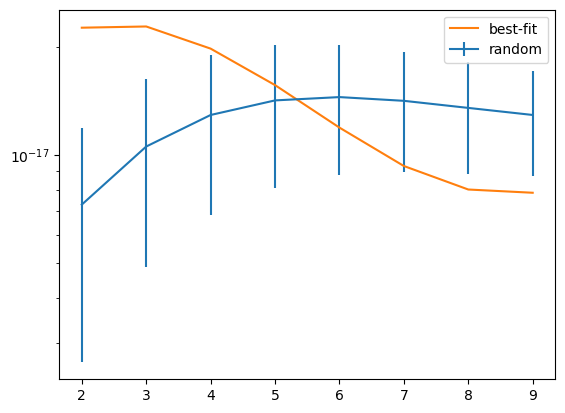

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1083.184105
    giving an angle 100*theta_* = 1.045401
 -> baryon drag stops at z = 1059.887878
    corresponding to conformal time = 286.322926 Mpc
    with comoving sound horizon rs = 147.074452 Mpc
 -> many-step reionization gives optical depth = 0.075805


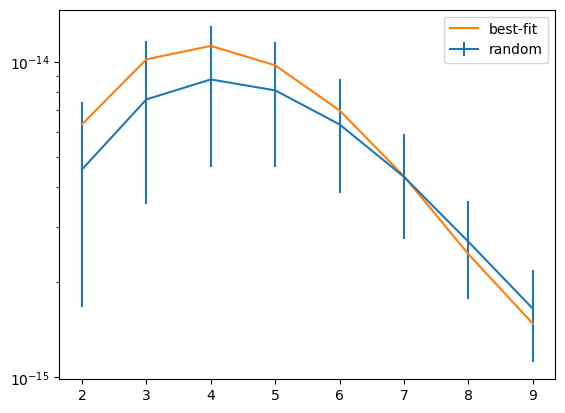

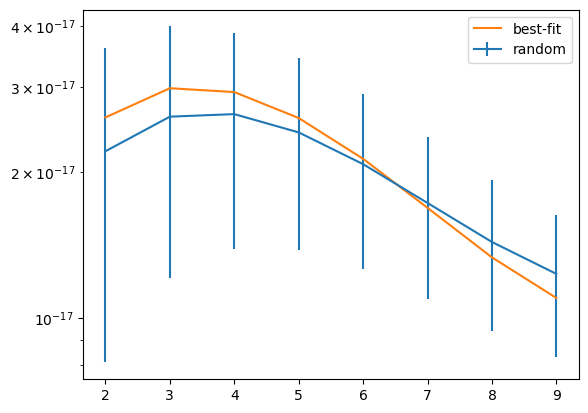

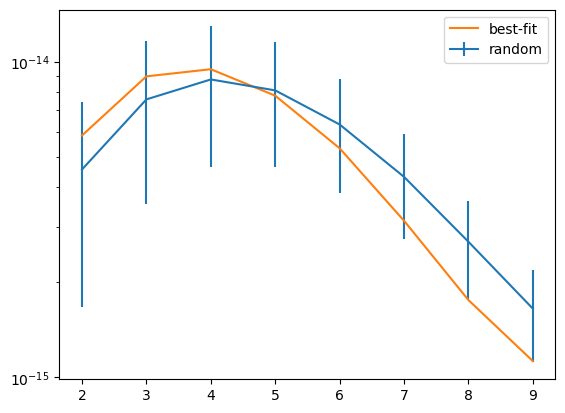

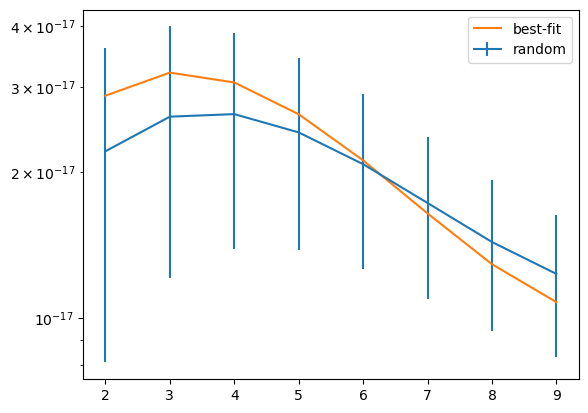

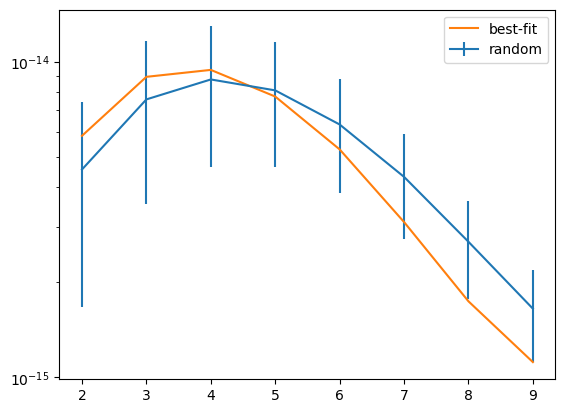

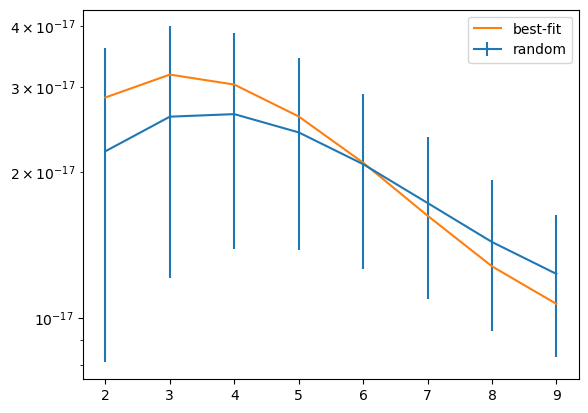

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775239
    corresponding to conformal time = 280.650004 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1084.875659
    giving an angle 100*theta_* = 1.044307
 -> baryon drag stops at z = 1059.889334
    corresponding to conformal time = 286.322634 Mpc
    with comoving sound horizon rs = 147.074320 Mpc
 -> many-step reionization gives optical depth = 0.057148


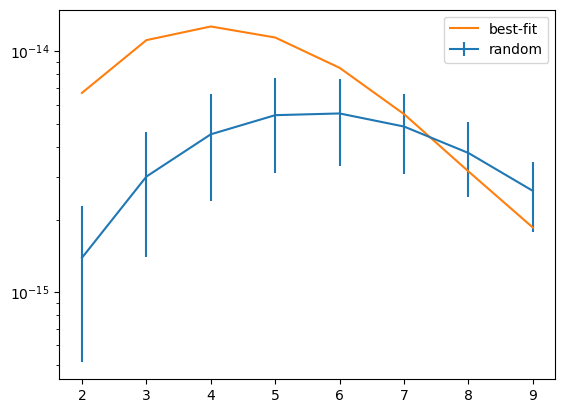

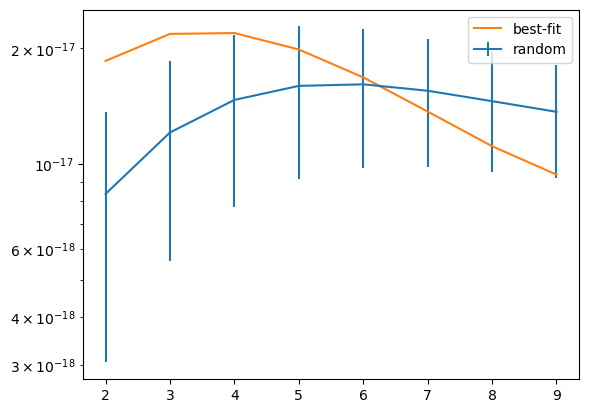

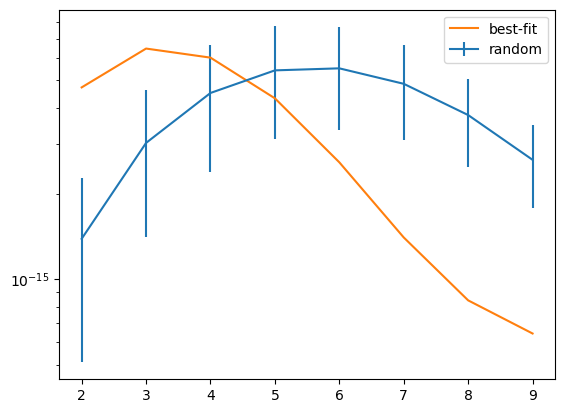

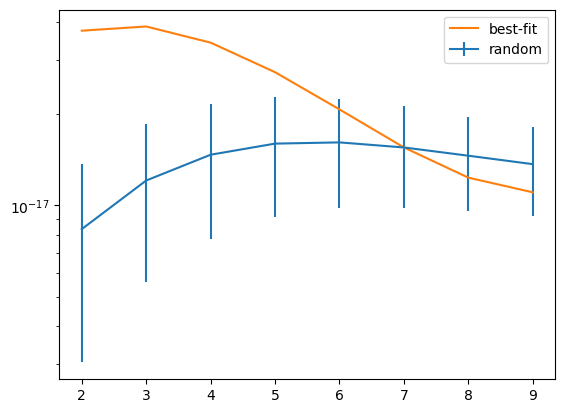

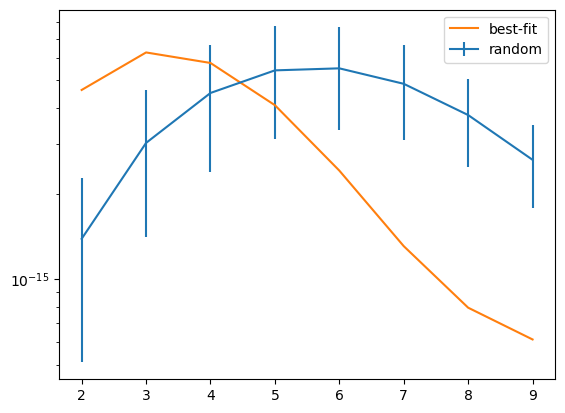

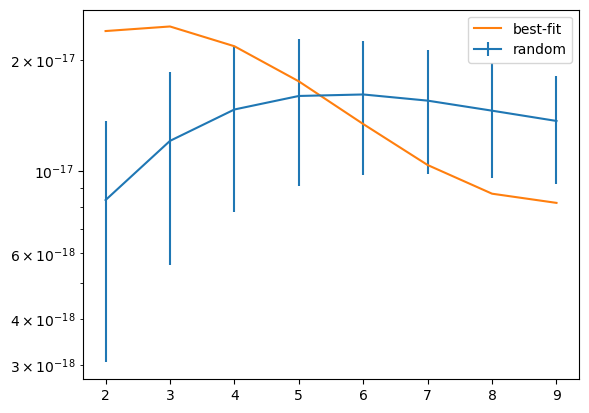

In [12]:
for i in range(len(points)):
    points[i].run()

    data1=np.loadtxt("/home/hcjiang/class/output/a_check00_cl_lensed.dat")
    error_E=error_cal(data1[:,1],spectrum,2002)
    error_B=error_cal(data1[:,2],spectrum,2002)

    #10
    ps.write_ps("fit",["r","z_reio"],best_fit_10[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_10.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #10_2002
    ps.write_ps("fit",["r","z_reio"],best_fit_10_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_10_2002.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    #2002
    ps.write_ps("fit",["r","z_reio"],best_fit_2002[i],verbose=False)
    os.system("./class fit.ini")
    data2=np.loadtxt("/home/hcjiang/class/output/fit00_cl_lensed.dat")
    plot_ps(data1,data2,10,10,error_E,error_B)
    chi2_2002.append(chi2(spectrum,data1[:,1],data2[:,1])+chi2(spectrum,data1[:,2],data2[:,2]))
    os.system("rm -rf /home/hcjiang/class/output/fit*dat")

    os.system("rm -rf /home/hcjiang/class/output/a_check*dat")
    

$\chi^2$ 存在`result_24_02_15/small`中了

In [19]:
np.save("/home/hcjiang/class/result_24_02_15/small/10/chi2.npy",np.array(chi2_10))
np.save("/home/hcjiang/class/result_24_02_15/small/10_2002/chi2.npy",np.array(chi2_10_2002))
np.save("/home/hcjiang/class/result_24_02_15/small/2002/chi2.npy",np.array(chi2_2002))

In [16]:
chi2_10

[-945.2513221162144,
 -953.2565893296055,
 -949.4749902648407,
 -932.6176512677956,
 -951.3535847827782,
 -948.9207974837141,
 -955.3045533468133,
 -942.6312766024836,
 -951.7473262345723,
 -958.8206522469469,
 -936.5888360742084,
 -942.7393576803631,
 -955.7267139746575,
 -929.955428970863,
 -949.328721445129,
 -980.2539793146734,
 -946.8215263902566,
 -939.9356319503781,
 -949.2182391094995,
 -939.4648651825735]

In [17]:
chi2_10_2002

[-881.1427379313423,
 -940.4512711759729,
 -901.0725747962305,
 -826.6495818987697,
 -944.6525693574844,
 -945.5940984573745,
 -893.8652643899642,
 -853.9523061899367,
 -945.8071403338811,
 -932.3960221937461,
 -820.0474463910011,
 -868.7022053945634,
 -922.2076159240305,
 -813.1124490722643,
 -921.2572697780605,
 -978.4738828886705,
 -896.5101333215696,
 -847.204173387165,
 -945.3577536458313,
 -856.0984163456828]

In [18]:
chi2_2002

[-875.3047820416587,
 -939.8605214375613,
 -895.3300704666663,
 -815.2207641167216,
 -944.4091633929175,
 -945.5651993970519,
 -887.0230435648132,
 -842.8740950305025,
 -945.4316585650491,
 -929.9449772273937,
 -805.012209422093,
 -860.2824253414042,
 -918.6901902976115,
 -800.3890373451345,
 -918.706376181399,
 -978.0234338055616,
 -890.8608278241265,
 -835.7193859482776,
 -945.1371774436235,
 -846.4478978464072]